# Market Research Analysis

You have decided to open a small cafe in Los Angeles. Your cafe can be said to be quite unique, because you "employ" a robot as a waiter or waitress. This project is promising, but requires a large capital. Therefore, you and your partners decided to attract investors. They're intrigued by current market conditions—but can you maintain your success when the robot's appeal starts to wane?

Considering that you are an analytical expert, partners also ask you to prepare some market research. You have open source data (*open source*) about restaurants in LA.

<b>Objective:</b>
   - Market research for restaurants in LA

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
2. [Data Pre-processing](#Pre-processing)
3. [*Exploratory Data Analysis*](#EDA)
    - [Proportion of different types of business](#1)
    - [Proportion of franchised and non-franchised business types](#2)
    - [Type of business that is usually a franchise](#3)
    - [Characteristics of a franchise-based business](#4)
    - [Average number of seats for each type of business](#5)
    - [Top 10 street names based on number of businesses](#6)
    - [Number of streets with only one type of business](#7)
    - [Distribution of the number of seats on the street occupied by various types of businesses](#8)
4. [General Conclusion](#Conclusion)
5. [Presentation](#Presentation)

In [1]:
# To separate addresses using the usaddress library
!pip install -q usaddress

In [2]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import re
import usaddress
import warnings
warnings.filterwarnings('ignore')

## Data Overview <a id="Start"></a>

In [3]:
# Dataset
df_rest = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\9 Project\\rest_data_us.csv')

In [4]:
# General information
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# Dataset size
df_rest.shape

(9651, 6)

In [6]:
# Sample data
df_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Documentation:
- `id` - Business type ID
- `object_name`  - business name
- `address` - address
- `chain`  - chain based business (TRUE/FALSE)
- `object_type`  - business type
- `number` - number of seats

In [7]:
# Checking for duplicates
df_rest.duplicated().sum()

0

In [8]:
# Checking for missing values
df_rest.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

**Tentative conclusion**

1. There is a missing value in the chain column,
2. There are no duplicate values,
3. Column naming and data types are already good.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

In [9]:
# Significance of missing values
(len(df_rest[df_rest['chain'].isnull()])/len(df_rest))*100

0.031084861672365557

In [10]:
# Filter missing data
df_rest_fx = df_rest[~(df_rest['chain'].isnull())]

In [11]:
# Check results
df_rest_fx.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

**Tentative conclusion**

Since the numbers are not significant, the missing values ​​can be corrected by eliminating the missing values.

[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Proportion of different types of business <a id="1"></a>

In [12]:
# Sample data
df_rest_fx.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [13]:
# Agg by type of business
rest_obj = (df_rest_fx.groupby('object_type').agg({
    'id':'count'
}).reset_index())

In [14]:
# 5 top types of business
top_5_obj = rest_obj.sort_values(by='id', ascending=False).head()

# Displays the result
top_5_obj

,object_type,id
5,Restaurant,7253
3,Fast Food,1066
2,Cafe,435
4,Pizza,319
1,Bar,292


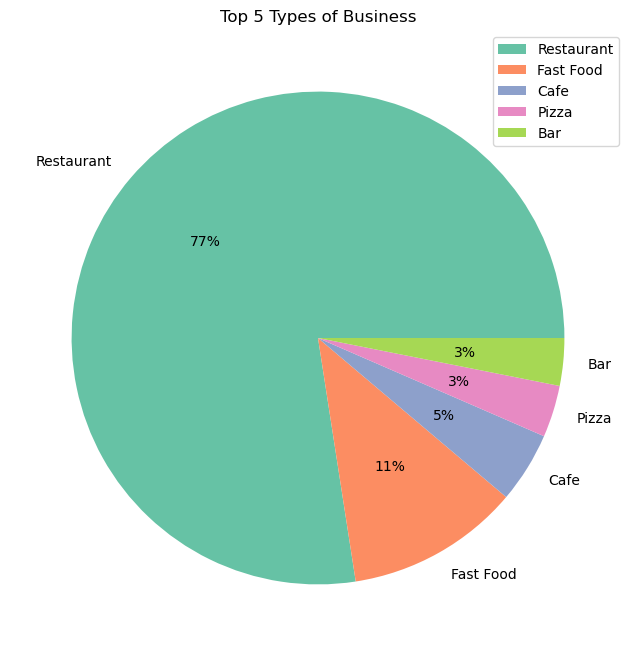

In [15]:
# Size chart
plt.figure(figsize=(8,8))

# Changing the color of the chart
colors_ = sns.color_palette('Set2')

# Pie charts
plt.pie(top_5_obj['id'], labels =top_5_obj['object_type'], colors = colors_, autopct='%.0f%%')

# Chart title
plt.title("Top 5 Types of Business")

# Legend
plt.legend()

# Displays chart
plt.show()

*Findings*:
1. From the table, it can be concluded that the most common type of business in LA is restaurants with a total of 7253.
2. The second most common type of business is Fast Food with a total of 1066.
3. Cafes are the third most common type of business with 435, followed by Pizza with 319, and Bars with 292 being the least common type of business.

*Insights*:
1. Based on this data, it can be concluded that in LA the market condition is *highly saturated* or has been filled with existing restaurants, so it can be a challenge for the success of new cafes.
2. However, the uniqueness of a new cafe concept, such as using a robot as a waiter or waitress, can help differentiate the cafe from other restaurants and potentially attract customers.

[Back to stages](#back)

### Proportion of franchised and non-franchised business types <a id="2"></a>

In [16]:
# Agg based on the `chain` column
rest_ch = (df_rest_fx.groupby('chain').agg({
    'id':'count'
}).reset_index())

In [17]:
# Checking the result
rest_ch

,chain,id
0,False,5972
1,True,3676


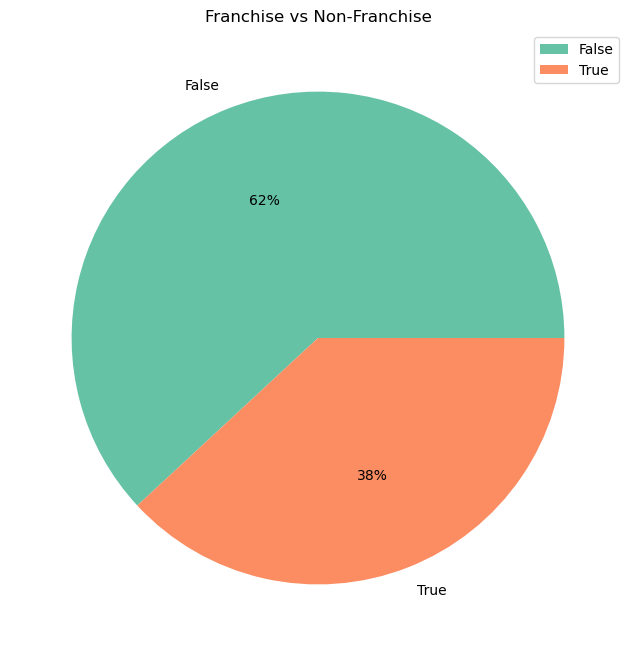

In [18]:
# Size chart
plt.figure(figsize=(8,8))

# Changing the color of the chart
colors_ = sns.color_palette('Set2')

# Pie charts
plt.pie(rest_ch['id'], labels =rest_ch['chain'], colors = colors_, autopct='%.0f%%')

# Chart title
plt.title("Franchise vs Non-Franchise")

# Legend
plt.legend()

# Displays graphs
plt.show()

*Findings*:
1. From the table, it can be concluded that the types of businesses in LA are dominated by types of businesses on a *chain* basis or franchises which have a total of 5972 or 62% of all types of businesses.
2. On the other hand, types of businesses on a *non-chain* basis or non-franchise account for 3,676 or 38% of all types of businesses.

*Insights*:
1. It can be concluded that the number of types of businesses that are included in the franchise is relatively smaller than the number of types of businesses that are not included in the franchise.
2. This information can provide insight into the level of competition the new cafe will face. Being a non-franchise type of business can be an advantage for new cafes as it can help differentiate them from other types of franchised businesses in the market.
3. However, further analysis of the target market, customer preferences and competition is required to determine the feasibility of the project.

[Back to stages](#back)

### Type of business that is usually a franchise <a id="3"></a>

In [19]:
# Data filters
rest_filt_ch = df_rest_fx.loc[df_rest_fx['chain']==True]

In [20]:
# Agg by type of business
rest_obj_ch = (rest_filt_ch.groupby('object_type').agg({
    'id' : 'count'
}).reset_index())

In [21]:
# Top 5 types of businesses
top_5_obj_ch = rest_obj_ch.sort_values(by='id', ascending=False).head()

# Displays the result
top_5_obj_ch

,object_type,id
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153


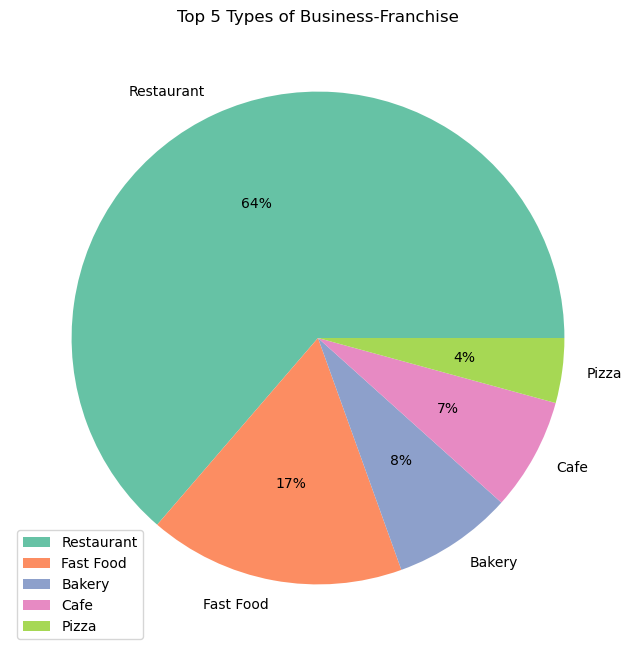

In [22]:
# Size chart
plt.figure(figsize=(8,8))

# Changing the color of the chart
colors_ = sns.color_palette('Set2')

# Pie charts
plt.pie(top_5_obj_ch['id'], labels =top_5_obj_ch['object_type'], colors = colors_, autopct='%.0f%%')

# Chart title
plt.title("Top 5 Types of Business-Franchise")

# Legend chart
plt.legend()

# Displays graphs
plt.show()

*Findings*:
1. From the table, it can be concluded that the most common type of business included in the franchise (chain) in LA is the type of restaurant business with a total of 2292 or as much as 64%.
2. The second most common type of business is fast food with a total of 605 or as much as 17%.
3. Followed by bakeries with 283 (8%), cafes with 266 (7%), and pizza with 153 (4%).

*Insights*:
1. This information can provide an overview of the dominance of restaurant types in franchising in LA and shows that the most common type of business in this type of business franchise is the type of business that serves general or standard food, such as restaurants and fast food.
2. However, this information provides only an initial overview and further analysis is needed to understand in more detail the existing competition in the Los Angeles restaurant market.

[Back to stages](#back)

### Characteristics of a franchise-based business <a id="4"></a>
Analyze from the following two points to determine the characteristics of a chain-based enterprise:
- has many places with a small number of seats, or
- has several places with a large number of seats

In [23]:
# Average seats on franchise-based business types
round(rest_filt_ch.number.mean())

40

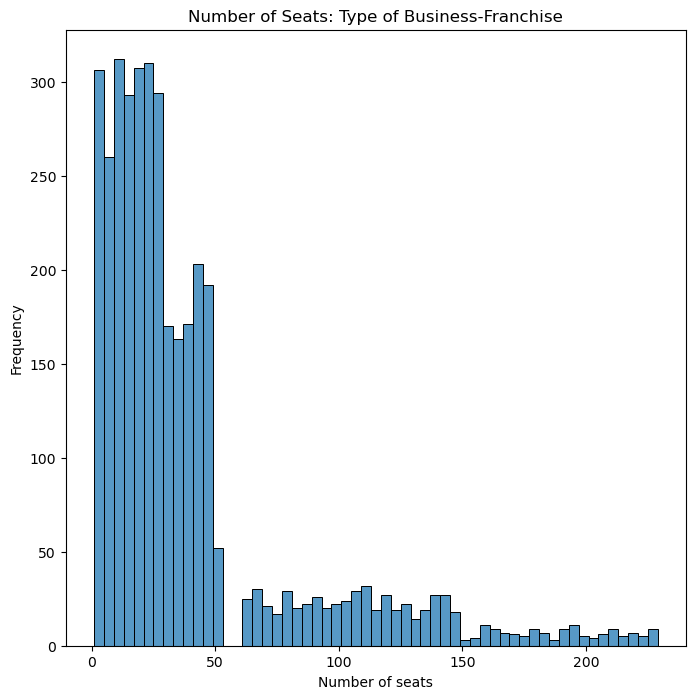

In [24]:
# Size chart
plt.figure(figsize=(8,8))

# Chart
sns.histplot(rest_filt_ch.number)

# Chart title
plt.title("Number of Seats: Type of Business-Franchise")

# Create names on the x,y-axis
plt.xlabel('Number of seats')
plt.ylabel('Frequency')

# Displays graphs
plt.show()

In [25]:
# Agg each type of business
rest_filt_ch.groupby('object_type').agg({
    'id':'count',
    'number':'mean'
}).sort_values(by='number', ascending=False)

,id,number
object_type,,
Restaurant,2292,44.856021
Bar,77,40.259740
Fast Food,605,38.089256
Cafe,266,25.917293
Pizza,153,25.529412
Bakery,283,21.773852


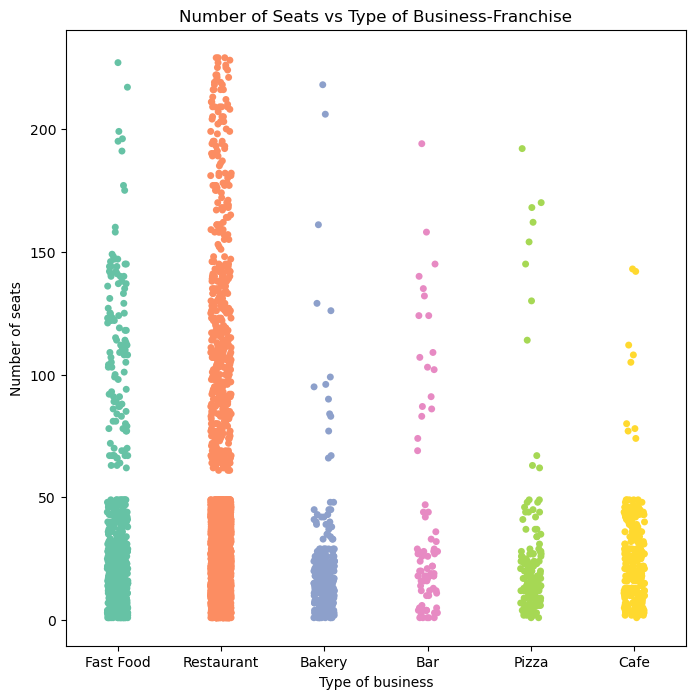

In [26]:
# Size chart
plt.figure(figsize=(8,8))

# Chart
sns.stripplot(x="object_type", y="number", data=rest_filt_ch, palette="Set2")

# Changing the color of the chart
sns.color_palette('Set2')

# Chart title
plt.title("Number of Seats vs Type of Business-Franchise")

# Create names on the x,y-axis
plt.xlabel('Type of business')
plt.ylabel('Number of seats')

# Displays chart
plt.show()

*Findings*:
1. It can be seen from the overall average number of seats which are only around 40 and each type of business has between 1-50 seats.
2. If we take a closer look at the table, it can be seen that the type of restaurant business has the highest average number of seats, which is around 45 seats, while the bakery has the lowest average number of seats, which is around 22 seats. However, all of these types of businesses have a number of seats ranging from 1-50.

*Insights*:
1. From the results of the analysis it can be concluded that franchise-based businesses tend to have many places with a small number of seats. Therefore, if there is a plan to open a franchise-based business, it is necessary to consider these factors in space and facility planning.

[Back to stages](#back)

### Average number of seats for each type of business <a id="5"></a>

In [27]:
# Agg dataset by type of business
rest_nmb = (df_rest_fx.groupby('object_type').agg({
    'number' : 'mean'
}).reset_index())

In [28]:
# Top 5 business types by number of seats
rest_nmb_sort = rest_nmb.sort_values(by='number', ascending=False)

In [29]:
# Round the values
rest_nmb_sort['number'] = round(rest_nmb_sort.number).astype('int')

In [30]:
# Checking the result
rest_nmb_sort

,object_type,number
5,Restaurant,48
1,Bar,45
3,Fast Food,32
4,Pizza,29
2,Cafe,25
0,Bakery,22


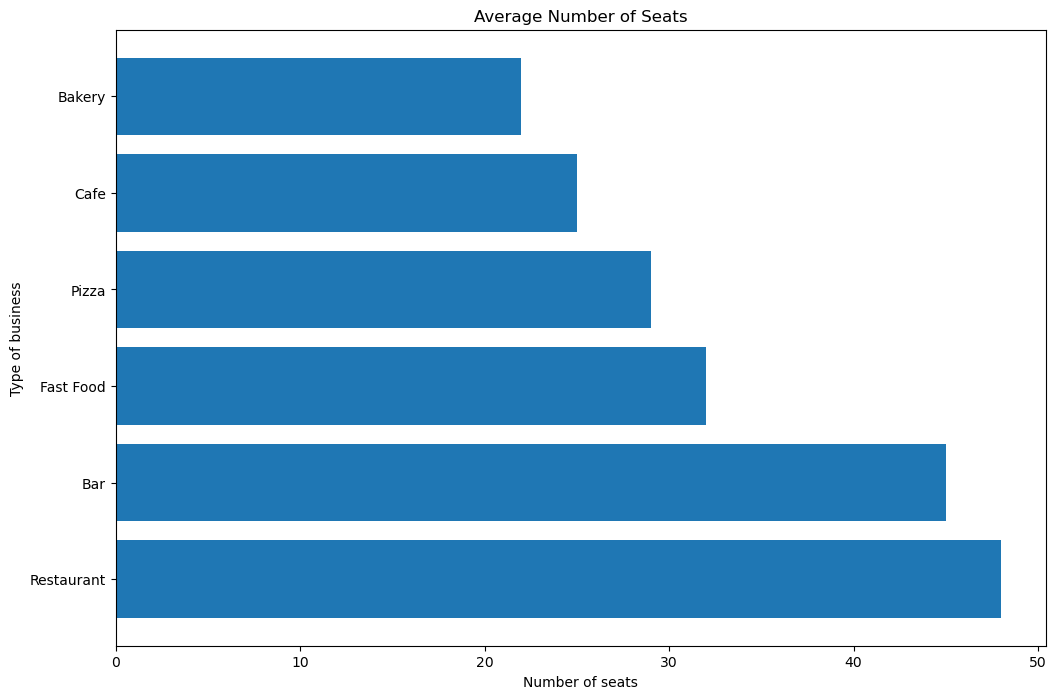

In [31]:
# Size chart
plt.figure(figsize=(12,8))

# Horizontal bars
plt.barh(y=rest_nmb_sort.object_type, width=rest_nmb_sort.number)

# Chart title
plt.title("Average Number of Seats")

# Create names on the x,y-axis
plt.xlabel('Number of seats')
plt.ylabel('Type of business')

# Displays charts
plt.show()

*Findings*:
1. It can be seen that the type of restaurant business has the highest average number of seats, which is around 48, followed by bars with an average number of seats around 45.
2. Meanwhile, cafes had the lowest average number of seats at around 25, followed by bakeries with an average number of seats around 22.

*Insights*:
1. It can be concluded that restaurants and bars tend to have more seats compared to other types of businesses such as cafes and bakeries.
2. Meanwhile, types of businesses such as fast food and pizza have an average number of seats that are in the middle.
3. This information can assist in planning and developing a new cafe business by optimizing the number of seats provided based on the type of business and customer preferences.
4. In addition, further analysis of customer preferences and competition in the market also needs to be done to ensure business success.

[Back to stages](#back)

### Top 10 street names based on number of businesses <a id="6"></a>

**Separating street names**

In [32]:
# Sample data
df_rest_fx.address.sample(10)

6394         317 S BROADWAY WAY # E-12
1810                 11300 W PICO BLVD
7838                     8738 W 3RD ST
3640                2280 S FIGUEROA ST
5862    11740 SAN VICENTE BLVD STE 101
2681                6426 WHITTIER BLVD
4726          3054 W 8TH ST UNIT 101-3
936                    2000 MARENGO ST
690                   8965 W PICO BLVD
6956           3959 WILSHIRE BLVD # B5
Name: address, dtype: object

In [33]:
# Function to perform string filter using the usaddress library
'''
Definition:
-----------
    Function to perform string filter with usaddress library
-----------
    parsed_address:
        separated address columns
    address:
        unsplit address column references
'''
def get_street_name(parsed_address, address):
    
    # After doing several trials OLVERA ST and 1/2 LOS ANGELES returned less good results
    # so the address is excluded by doing some conditions
    if "OLVERA ST" in address:
        return "OLVERA ST"
    elif "1/2 LOS ANGELES" in address:
        return "1/2 LOS ANGELES ST"
    
    else:
        # empty list
        street_components = []
        
        # Loop through each component in the parsed address
        for component in parsed_address:
            
            # Checks if component is a pathname component in the usaddress library
            if component[1] in ['StreetNamePreDirectional', 'StreetName', 'StreetNamePostType', 'StreetNamePostDirectional']:
                
                # Adds the result to an empty list of street_components
                street_components.append(component[0])
        return ' '.join(street_components)

In [34]:
# Using the usaddress parse library to get the address component in the `address` column
parsed_addresses = [usaddress.parse(addr) for addr in df_rest_fx['address']]

# Using the get_street_name function to get the street name
# by matching the result of parsed_addresses with the value of the `address` column
# zip combines the list of parsed_addresses, and df_rest_fx.address variables
df_rest_fx['street_name'] = [get_street_name(parsed_addr, addr) for parsed_addr, addr in zip(parsed_addresses, df_rest_fx['address'])]

In [35]:
# References to check the result of the function and the result of the check
# there are several roads that need to be repaired

# These are code to check each address
# temp = df_rest_fx['street_name'].value_counts()
# pd.DataFrame(temp.loc[temp == 1].index.unique())
# df_rest_fx.loc[df_rest_fx['address'].str.contains('JAPANESE VLG'), ['address','street_name']]
# df_rest_fx.loc[df_rest_fx['street_name']=='CENTURY park E', ['address','street_name']]

# After checking there are several values from the `street_name` column that can be corrected
# 505 -> WESTWOOD PLZ
# OF THE STARS -> AVENUE OF THE STARS
# E PLZ MALL -> E JAPANESE VLG
# JAPANESE VILLAGE PLAZA MALL -> JAPANESE VLG PLZ MALL
# E 11th ST-> E 11TH ST
# N vine ST-> N VINE ST
# W 8th ST-> W 8TH ST
# Z00 DR -> ZOO DR
# ST. VINCENT CT->ST VINCENT CT
# S LOS ANGELES->S LOS ANGELES ST
# LOS ANGELES STS->LOS ANGELES ST
# 3/4 WALL ST->WALL ST
# W pico BLVD->W PICO BLVD
# 3/4 1ST ST->1ST ST
# 1/4 1ST ST->1ST ST
# E CENTURY park->E CENTURY PARK
# W JAMES M. WOOD BLVD->W JAMES M WOOD BLVD
# hollywood BLVD->HOLLYWOOD BLVD
# CENTURY park E->CENTURY PARK E
# JAMES M. WOOD BLVD->JAMES M WOOD BLVD
# 1/4 FAIR PARK AVE->FAIR PARK AVE
# W sunset BLVD->W SUNSET BLVD

In [36]:
# Fixed results
df_rest_fx['street_name'] = df_rest_fx['street_name'].replace({
    '505': 'WESTWOOD PLZ',
    'OF THE STARS' : 'AVENUE OF THE STARS',
    'E PLZ MALL' : 'E JAPANESE VLG',
    'JAPANESE VILLAGE PLAZA MALL' : 'JAPANESE VLG PLZ MALL',
    'E 11th ST' : 'E 11TH ST',
    'N vine ST' : 'N VINE ST',
    'W 8th ST' : 'W 8TH ST',
    'Z00 DR' : 'ZOO DR',
    'ST. VINCENT CT' : 'ST VINCENT CT',
    'S LOS ANGELES': 'S LOS ANGELES ST',
    'LOS ANGELES STS' : 'LOS ANGELES ST',
    'W pico BLVD' : 'W PICO BLVD',
    'E CENTURY park' : 'E CENTURY PARK',
    'W JAMES M. WOOD BLVD' : 'W JAMES M WOOD BLVD',
    'hollywood BLVD' : 'HOLLYWOOD BLVD',
    'CENTURY park E' : 'CENTURY PARK E',
    'JAMES M. WOOD BLVD' : 'JAMES M WOOD BLVD',
    '1/4 FAIR PARK AVE' : 'FAIR PARK AVE',
    'W sunset BLVD': 'W SUNSET BLVD'
})

In [37]:
# Sample data
df_rest_fx['street_name'].sample(5)

7102      W IMPERIAL HWY
6963    S LOS ANGELES ST
2675           S MAIN ST
4478          S BROADWAY
5620            W 6TH ST
Name: street_name, dtype: object

**The 10 best street based on the type of business**

In [38]:
# Agg by street name
rest_st_nmb = (df_rest_fx.groupby('street_name').agg({
    'id':'count'
}).reset_index())

In [39]:
# Top 10 street names by number of restaurants
top_10_st = rest_st_nmb.sort_values(by='id', ascending=False).head(10)

In [40]:
# Displays the result
top_10_st

,street_name,id
764,WILSHIRE BLVD,384
732,W SUNSET BLVD,369
726,W PICO BLVD,342
577,S WESTERN AVE,276
590,SANTA MONICA BLVD,260
219,HOLLYWOOD BLVD,242
724,W OLYMPIC BLVD,233
655,W 3RD ST,230
491,S FIGUEROA ST,228
570,S VERMONT AVE,212


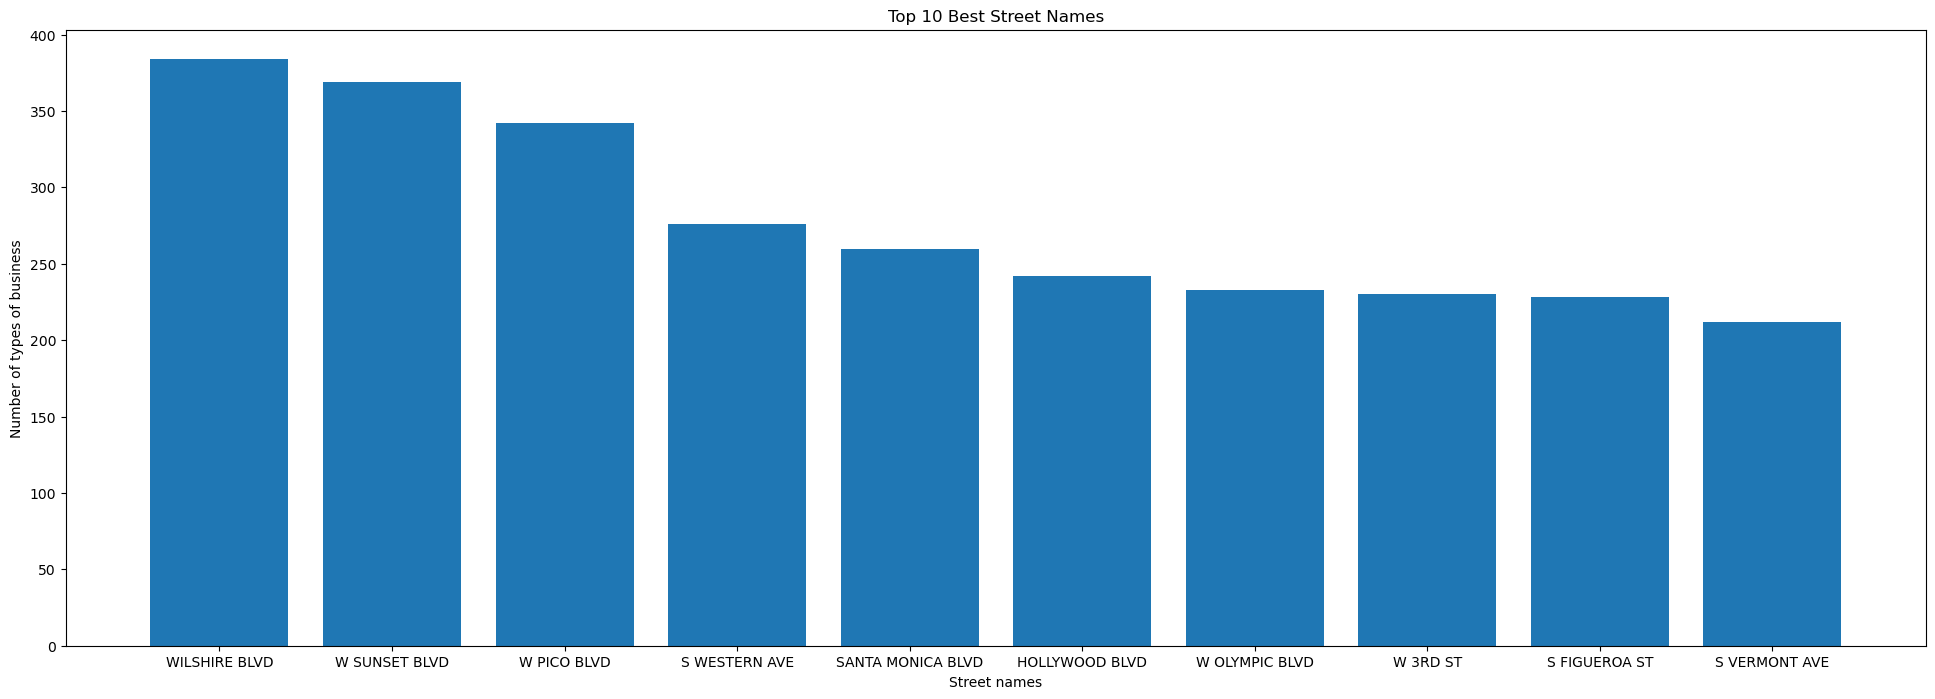

In [41]:
# Size chart
plt.figure(figsize=(24,8))

# Bar chart
plt.bar(top_10_st.street_name, height=top_10_st.id)

# Chart title
plt.title("Top 10 Best Street Names")

# Create names on the x,y-axis
plt.xlabel('Street names')
plt.ylabel('Number of types of business')

# Displays chart
plt.show()

*Findings*:
1. You can see the ten street names with the highest number of types of businesses in LA. WILSHIRE BLVD is the name of the street with the most types of businesses, followed by W SUNSET BLVD, W PICO BLVD, S WESTERN AVE, SANTA MONICA BLVD

*Insights*:
1. The results of this analysis can provide important information for entrepreneurs in determining strategic locations to open new businesses.
2. Entrepreneurs may consider street names with a high number of business types to attract more customers and maximize profits.
3. However, entrepreneurs also need to consider other factors such as competition and customer preferences in determining the ideal business location.

[Back to stages](#back)

### Number of streets with only one type of business <a id="7"></a>

In [42]:
# Filter data
rest_st_nmb.loc[rest_st_nmb['id']==1][['street_name']]

,street_name
0,1/2 LOS ANGELES ST
1,1/4 1ST ST
2,1ST ST
3,2 BLVD
4,2ND ST
...,...
754,WESTERN HERITAGE WAY
760,WILEY POST AVE
761,WILLOW ST
763,WILSHIRE


*Findings*:
1. it can be concluded that as many as 340 streets in Los Angeles have only one restaurant along that street. This can provide some information for entrepreneurs who want to open a restaurant business in Los Angeles.

*Insights*:
1. a location that has many types of businesses around it may be more attractive to consumers, because it can offer many menu choices and a diverse atmosphere. However, entrepreneurs also need to consider the intense competition in the area.
2. Locations that have only one type of business in the vicinity may be able to offer an unfulfilled market. However, entrepreneurs need to ensure that their business can attract enough customers to maintain business continuity.
3. In both cases above, the entrepreneur needs to consider other factors such as rental costs, accessibility, and target market in selecting the ideal business location.

[Back to stages](#back)

### Distribution of the number of seats on the street occupied by various types of businesses <a id="8"></a>

**WILSHIRE BLVD, W SUNSET BLVD, and W PICO BLVD Road**

In [43]:
# Function to generate agg number based on `object_type` column
'''
Definition:
-----------
    Function to generate agg number based on `object_type` column
-----------
    df:
        desired data
    street_name:
        desired street name
'''
def agg_by_street(df, street_name):
    if street_name == 'WILSHIRE BLVD':
        filtered_df = df.loc[df['street_name'] == 'WILSHIRE BLVD']
    elif street_name == 'W SUNSET BLVD' or street_name == 'W PICO BLVD':
        filtered_df = df.loc[df['street_name'] == street_name]
    else:
        raise ValueError('Invalid street name')
    
    # Agg based on street name and type of business
    agg_df = (filtered_df.groupby(['street_name', 'object_type']).agg({
        'number': 'count'
    }).reset_index()).sort_values(by='number', ascending=False)
    
    return agg_df

In [44]:
# Implement the function
obj_wilshire = agg_by_street(df_rest_fx, 'WILSHIRE BLVD')

# Show results
obj_wilshire

,street_name,object_type,number
5,WILSHIRE BLVD,Restaurant,309
3,WILSHIRE BLVD,Fast Food,25
2,WILSHIRE BLVD,Cafe,24
4,WILSHIRE BLVD,Pizza,11
1,WILSHIRE BLVD,Bar,10
0,WILSHIRE BLVD,Bakery,5


In [45]:
# Implement the function
obj_sunset = agg_by_street(df_rest_fx, 'W SUNSET BLVD')

# Show results
obj_sunset

,street_name,object_type,number
5,W SUNSET BLVD,Restaurant,272
3,W SUNSET BLVD,Fast Food,31
2,W SUNSET BLVD,Cafe,24
4,W SUNSET BLVD,Pizza,17
1,W SUNSET BLVD,Bar,13
0,W SUNSET BLVD,Bakery,12


In [46]:
# Implement function
obj_pico = agg_by_street(df_rest_fx, 'W PICO BLVD')

# Show results
obj_pico

,street_name,object_type,number
5,W PICO BLVD,Restaurant,257
3,W PICO BLVD,Fast Food,30
4,W PICO BLVD,Pizza,18
0,W PICO BLVD,Bakery,13
2,W PICO BLVD,Cafe,13
1,W PICO BLVD,Bar,11


In [47]:
# Function to make a pie chart according to the street name
'''
Definition:
-----------
    Function to make a pie chart according to the street name
-----------
    df:
        desired data
    columns:
        column you want to use
'''
def plot_pie_charts(df, column):
    
    # Street name
    street_names = ['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD']
    
    # Change the color
    colors_ = sns.color_palette('Set2')
    
    # Create pie charts
    for street_name in street_names:
        
        # Street name filter
        sub_df = df[df['street_name'] == street_name]
        
        # Check the condition of the street name
        if len(sub_df) == 0:
            continue
        
        # Agg number of business types
        obj_agg = (sub_df.groupby(['street_name', column]).agg({
        'number': 'count'
        }).reset_index())
        
        # Size chart
        plt.figure(figsize=(8,8))
        
        # Pie charts
        plt.pie(obj_agg['number'], labels=obj_agg[column], colors=colors_, autopct='%.0f%%')
        
        # Title
        plt.title(f"Type of Business-{street_name} Road")
        
        # Legends
        plt.legend()
    return plt.show()

In [48]:
# Data filters
rest_3 = df_rest_fx.loc[df_rest_fx['street_name'].isin(['WILSHIRE BLVD', 'W SUNSET BLVD', 'W PICO BLVD'])]

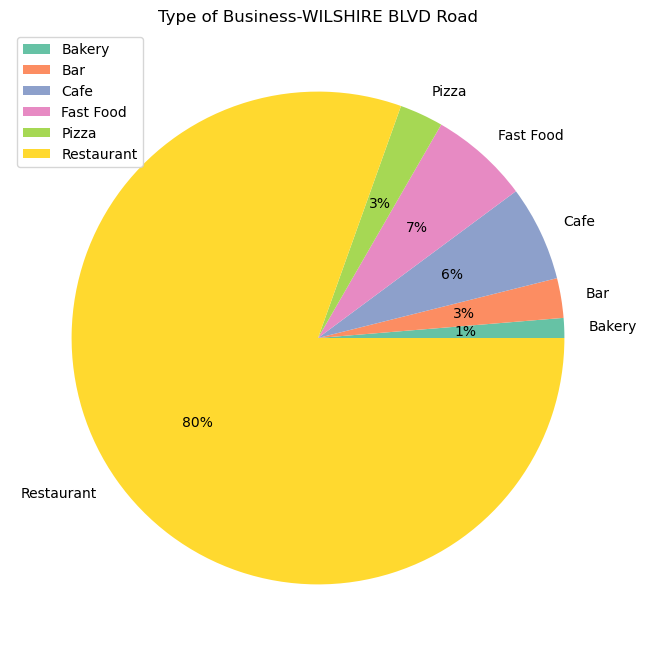

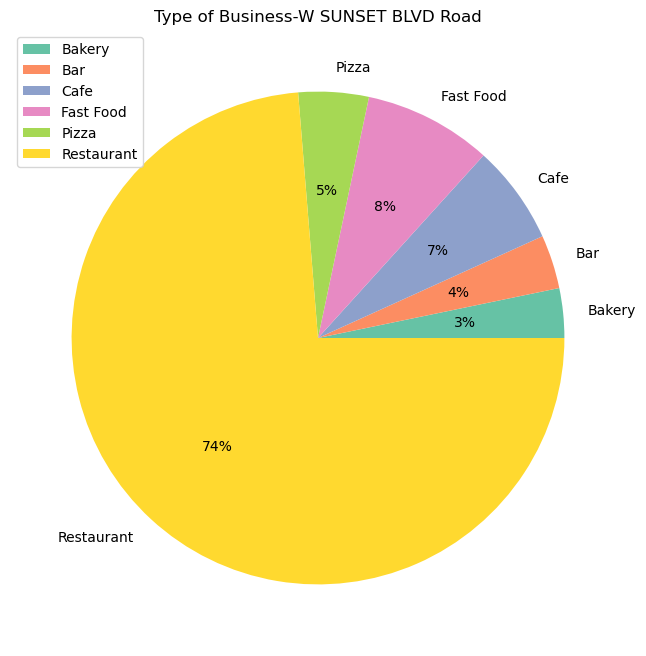

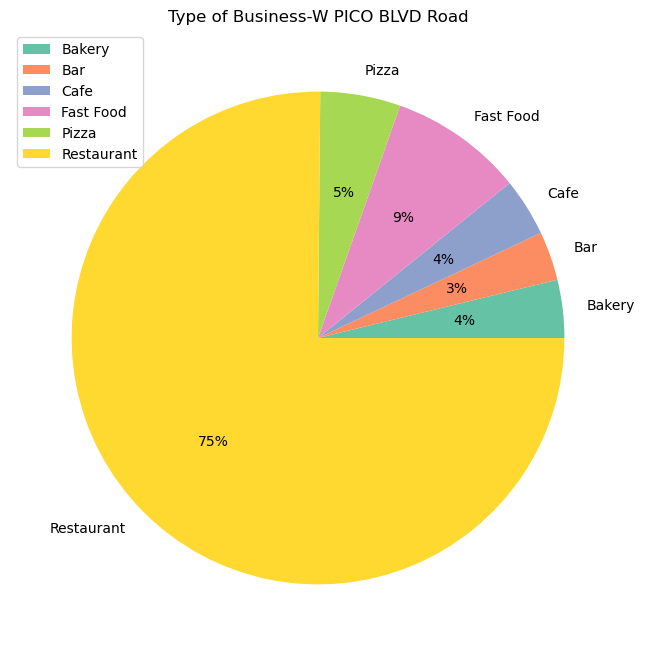

In [49]:
# Displays the result
plot_pie_charts(df=rest_3, column='object_type')

*Findings*:
1. From the data above, it can be observed that the trend of the number of seats for each type of business on the three roads is relatively similar.
2. Restaurants have the most number of seats, followed by fast food.
3. On WILSHIRE BLVD and W SUNSET BLVD streets, cafes are in 3rd place, but on W PICO BLVD roads, pizza is the type of business that is in 3rd place, and cafes are in 5th place.
4. The number of seats in the type of cafe business is relatively small compared to other types of businesses. On Jalan WILSHIRE BLVD, for example, the number of seats in the cafe business type is only 24, while the restaurant business type reaches 309 seats. The same thing can be seen on W SUNSET BLVD and W PICO BLVD roads.

*Insights*:
1. Therefore, it can be assumed that the distribution trend of the number of seats on the street occupied by many types of businesses indicates that cafe businesses have relatively fewer seats compared to other types of businesses.

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

After entering the dataset then carrying out the inspection, there are missing values ​​in the dataset, there are no duplications and the column names are also good. The missing values ​​were then successfully corrected and the dataset could be analyzed further. The following is the conclusion of the analysis results:
1. Restaurants are the most popular type of business in the city of LA.
2. There are more non-franchised or independent businesses than franchised businesses in LA.
3. Generally, the type of franchise business is a restaurant.
4. Types of businesses that have more seats tend to be in the type of restaurant business.
5. There is a market opportunity that is currently unexplored on streets that only have one type of business in the city of LA.
6. More number of seats for restaurants and bars
7. Wilshire BLVD, is the best way based on the number of types of businesses
8. On WILSHIRE BLVD, W SUNSET BLVD, and W PICO BLVD roads the trend for the number of seats is relatively similar, for the type of cafe business there is a trend with a relatively small number of seats compared to other types of businesses.

[Back to stages](#back)

------

## Presentation<a id="Presentation"></a>

Presentation: Market Research Analysis Results <https://drive.google.com/file/d/1daaYbbF86XksSaVjf_QIzwqsTwUFFfTI/view?usp=sharing>

[Back to stages](#back)